In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('stock_dataset.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


In [3]:
df.shape

(262, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.nunique()

Date         262
Open         255
High         247
Low          260
Close        257
Adj Close    257
Volume         1
dtype: int64

In [1]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

NameError: name 'plt' is not defined

In [10]:
# WE HAVE REDUNDANT DATA SO WE CAN DROP ONE OF THE COLUMN
df[df['Close'] == df['Adj Close']].shape

(262, 7)

In [11]:
df = df.drop(['Adj Close'], axis=1)

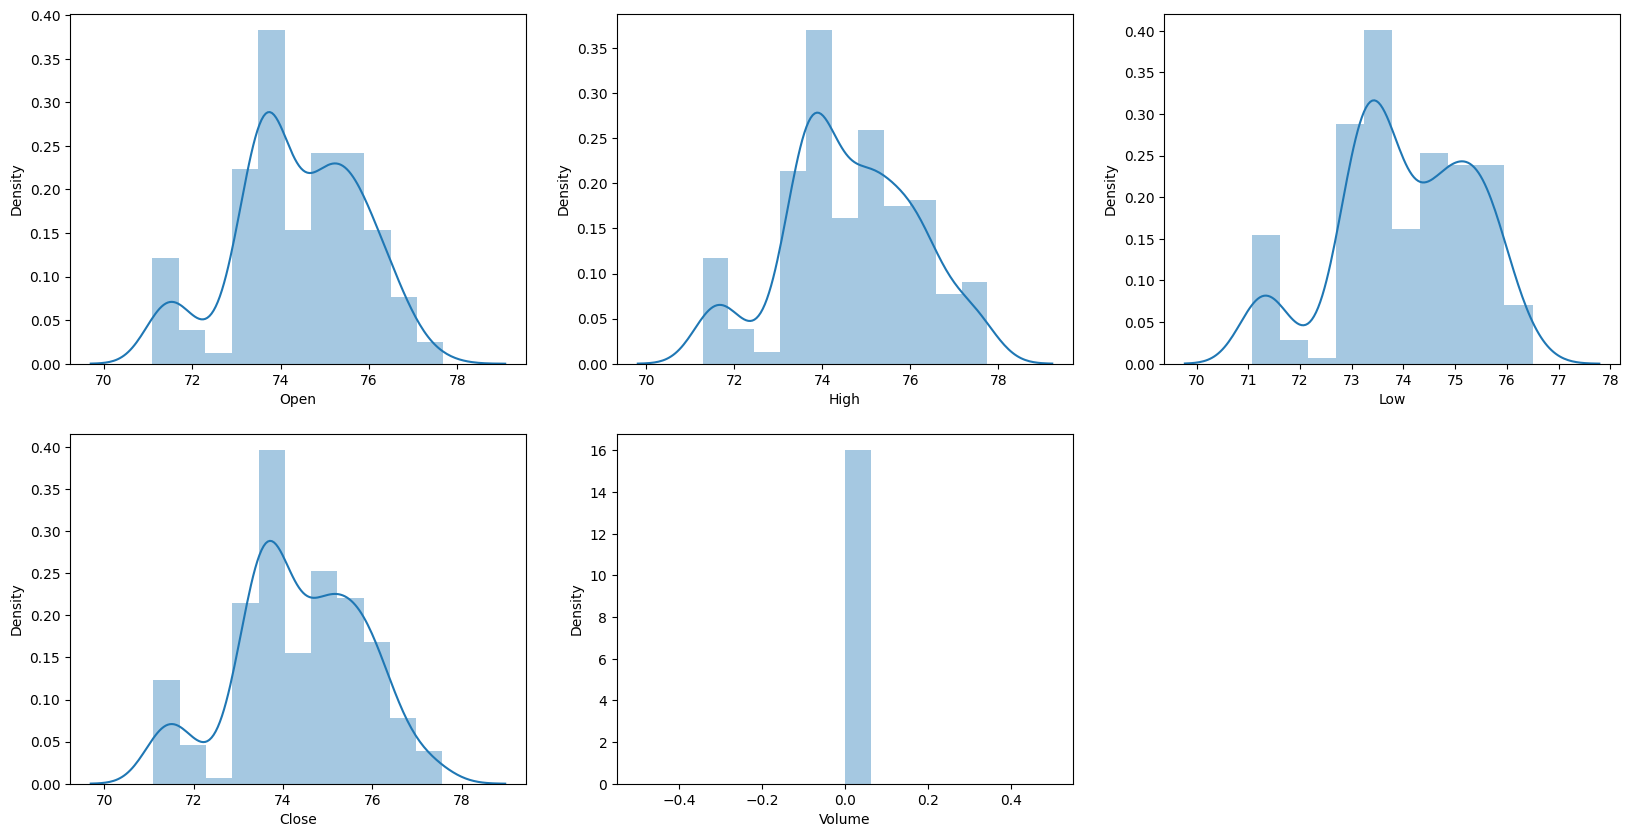

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

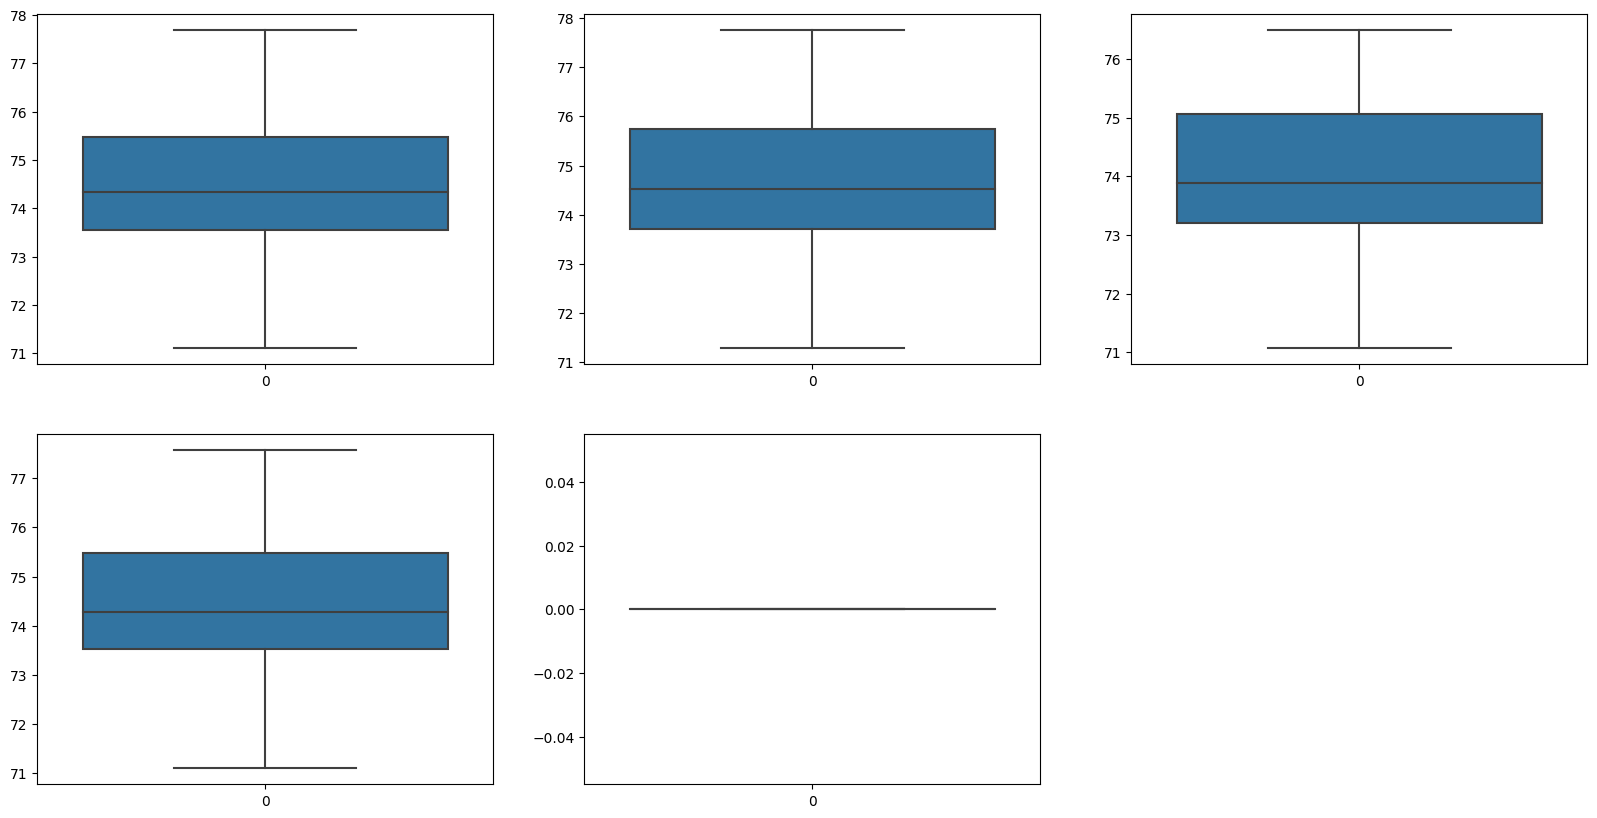

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [22]:
corr = df.corr(method="pearson")
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.977461,0.973483,0.988920,NaN
High,0.977461,1.000000,0.960726,0.976949,NaN
Low,0.973483,0.960726,1.000000,0.979301,NaN
Close,0.988920,0.976949,0.979301,1.000000,NaN
Volume,NaN,NaN,NaN,NaN,NaN


<Axes: >

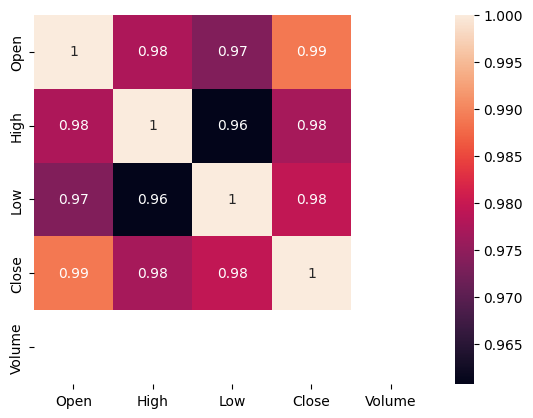

In [24]:
import seaborn as sns
sns.heatmap(corr, annot=True)


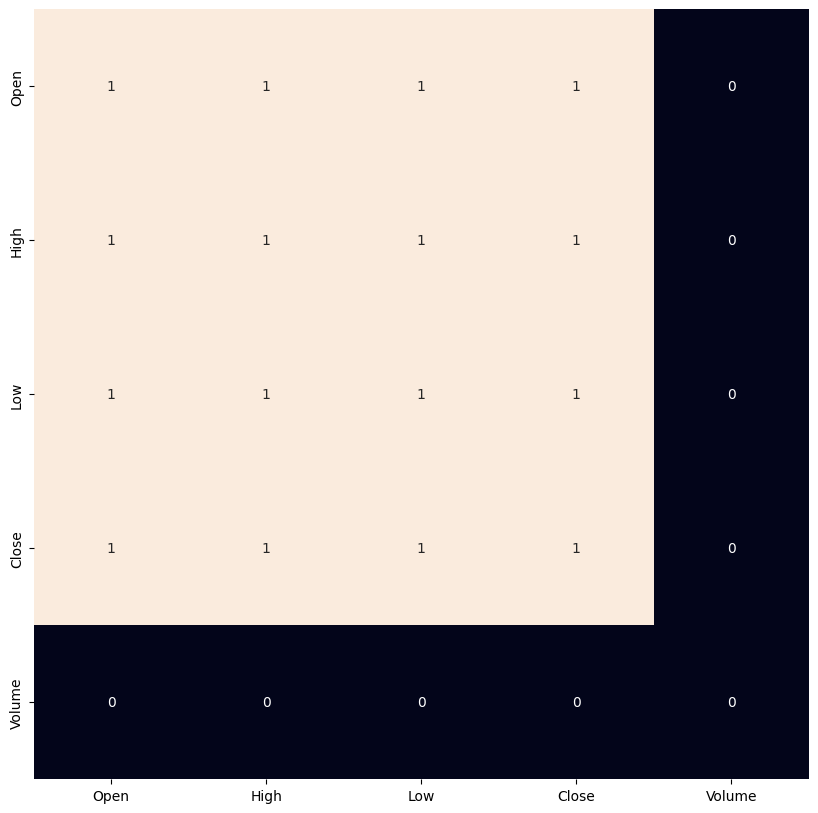

In [26]:
plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

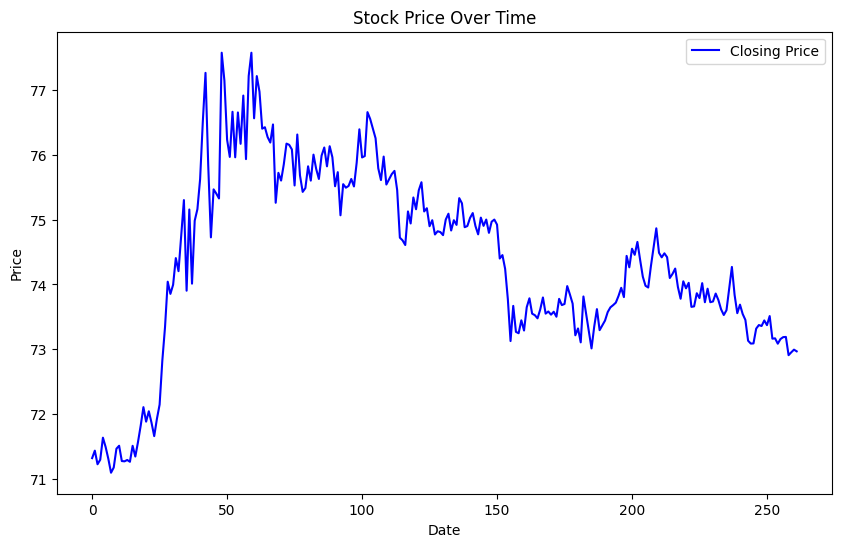

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Over Time")
plt.legend()
plt.show()

In [29]:
X = np.arange(len(df)).reshape(-1, 1)
y = df["Close"].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [35]:
# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

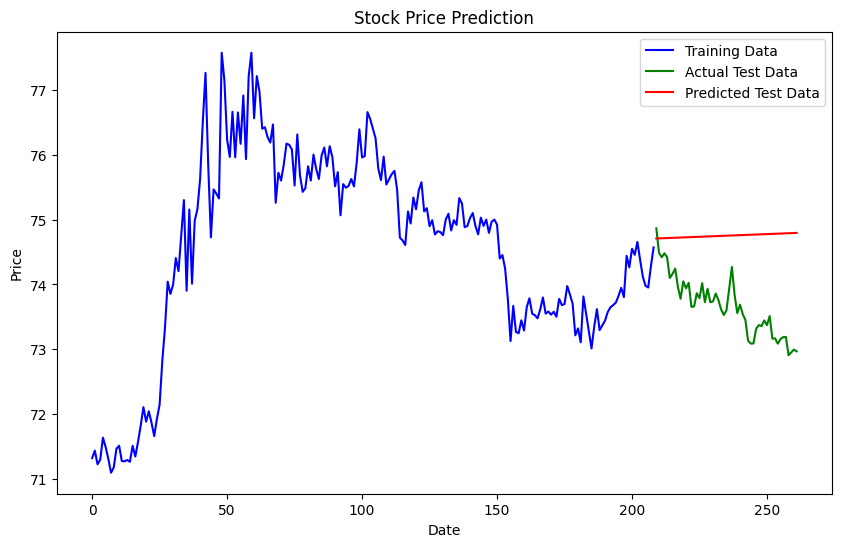

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[:-len(y_test)], y_train, label="Training Data", color="blue")
plt.plot(df.index[-len(y_test):], y_test, label="Actual Test Data", color="green")
plt.plot(df.index[-len(y_test):], y_pred_test, label="Predicted Test Data", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.show()

In [38]:
print(f"Mean Squared Error (Training): {mse_train:.2f}")
print(f"Mean Squared Error (Test): {mse_test:.2f}")

Mean Squared Error (Training): 2.32
Mean Squared Error (Test): 1.41
